In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
df = pd.read_csv("insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['sex'])
df['sex'] = le.transform(df['sex'])
df['smoker'] = le.fit_transform(df['smoker'])
dummies = pd.get_dummies(df['region'])
df = pd.concat([df, dummies],axis =1)

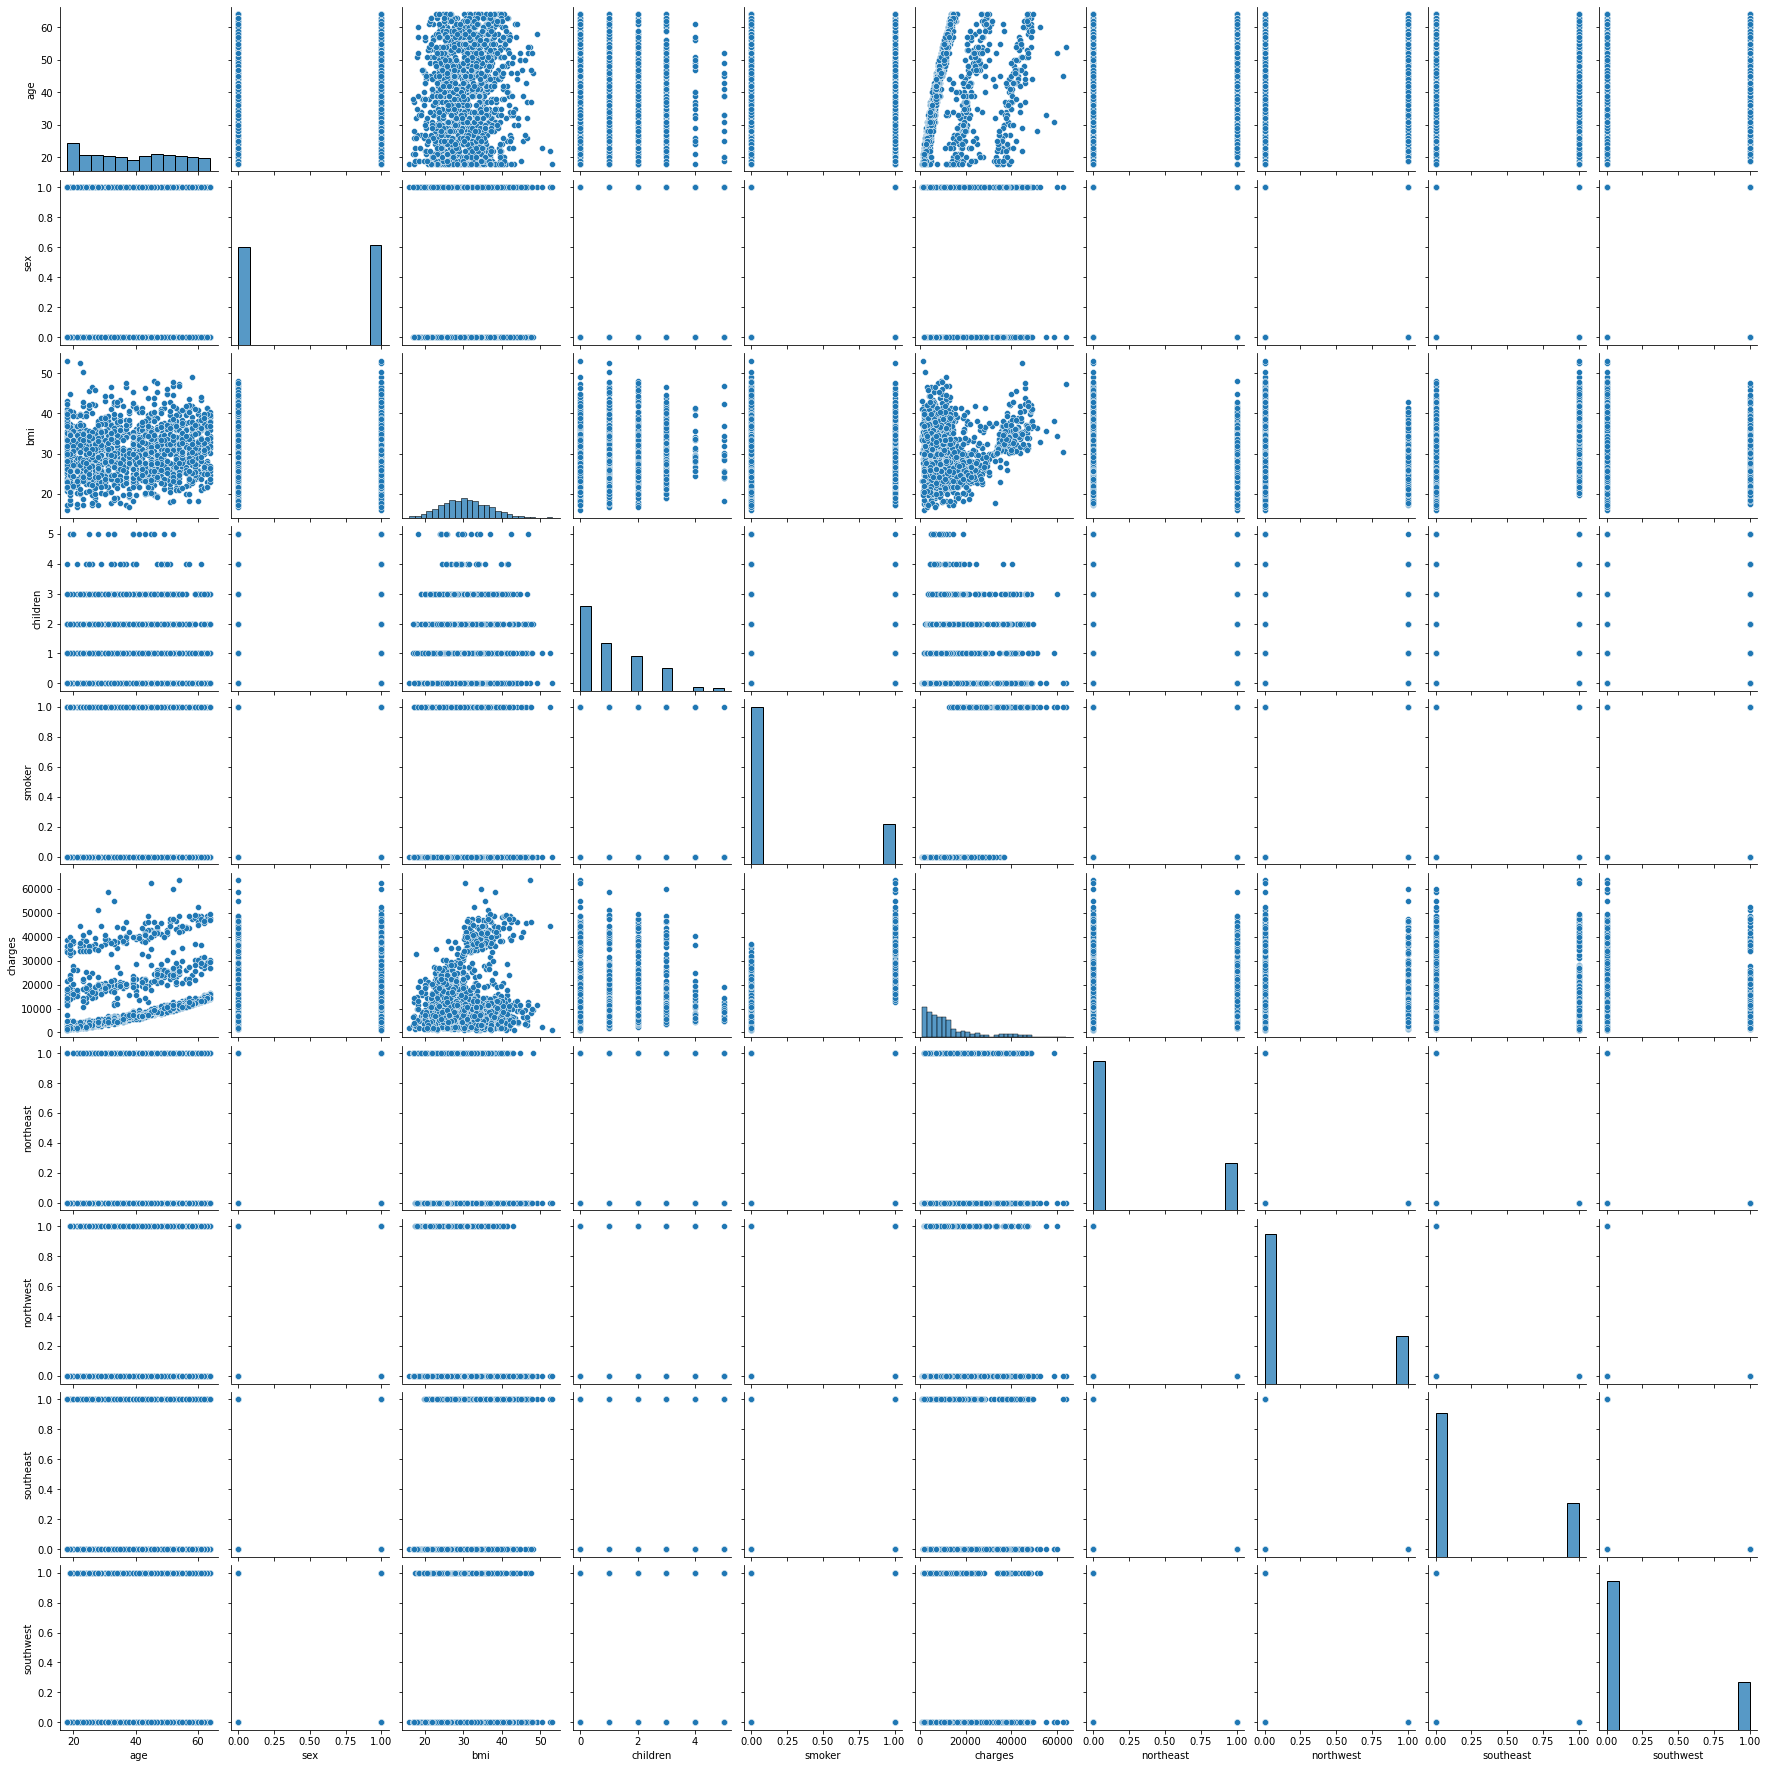

In [6]:
sns.pairplot(df)

C:\Users\Hemali Mane\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

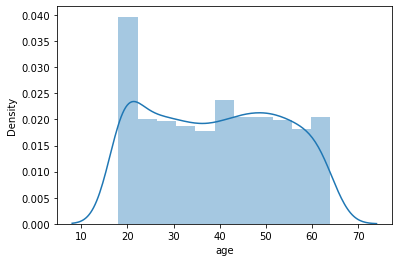

In [7]:
sns.distplot(df['age'])

In [8]:
skewValue = df['age'].skew(axis = 0)
skewValue

0.05567251565299186

C:\Users\Hemali Mane\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

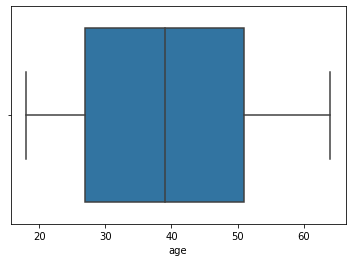

In [9]:
sns.boxplot(df['age'])

C:\Users\Hemali Mane\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='bmi', ylabel='Density'>

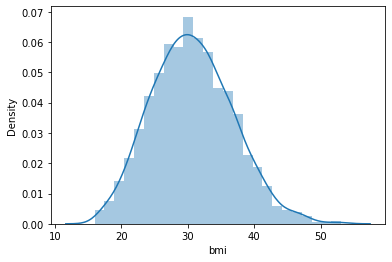

In [10]:
sns.distplot(df['bmi'])

C:\Users\Hemali Mane\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

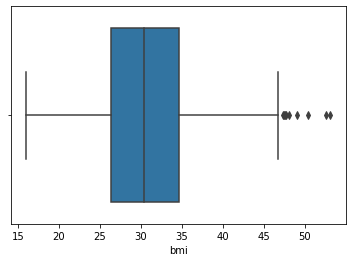

In [11]:
sns.boxplot(df['bmi'])

In [12]:
skewValue = df['bmi'].skew(axis = 0)
skewValue

0.2840471105987448

In [13]:
upper_limit = df['bmi'].mean() + 2.5*df['bmi'].std()
upper_limit

45.90886414018408

In [14]:
df[df['bmi']>upper_limit].count()

age          16
sex          16
bmi          16
children     16
smoker       16
region       16
charges      16
northeast    16
northwest    16
southeast    16
southwest    16
dtype: int64

In [15]:
df.drop(df[df['bmi']>upper_limit].index, inplace = True)

C:\Users\Hemali Mane\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

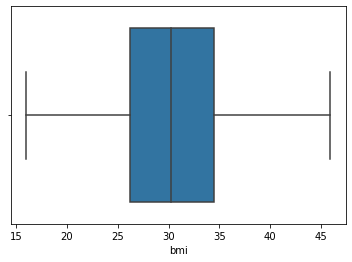

In [16]:
sns.boxplot(df['bmi'])

In [17]:
skewValue = df['bmi'].skew(axis = 0)
skewValue

0.10078528212016033

<AxesSubplot:>

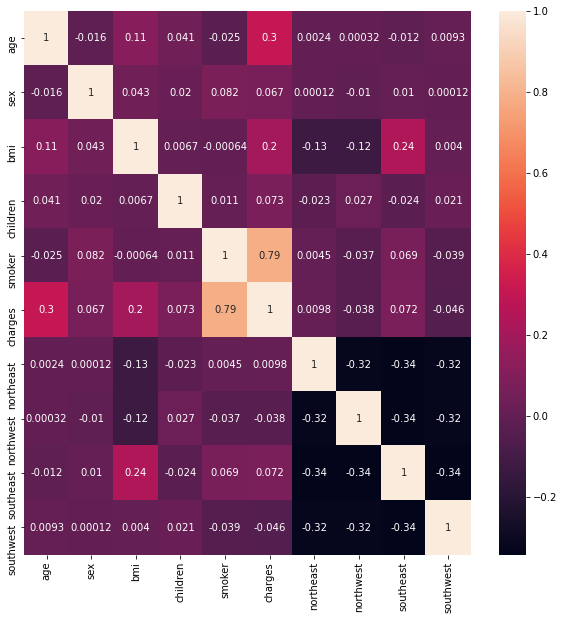

In [18]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(10,10))         
sns.heatmap(corr, annot=True,ax=ax)

<AxesSubplot:xlabel='age', ylabel='charges'>

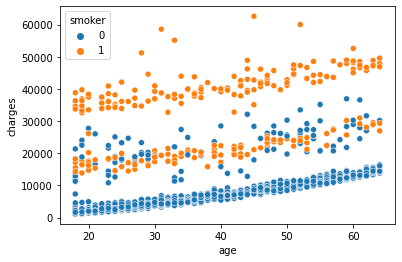

In [19]:
sns.scatterplot(data=df,x='age',y='charges',hue='smoker')

<AxesSubplot:xlabel='bmi', ylabel='charges'>

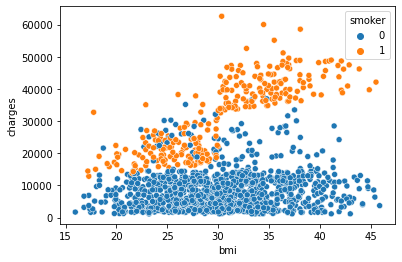

In [20]:
sns.scatterplot(data=df,x='bmi',y='charges',hue='smoker')

In [21]:
x = df[['age','sex','bmi','smoker','northeast','northwest','southeast']]
y = df['charges']

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(2)
x_poly= poly.fit_transform(x)

x_train, x_test, y_train, y_test= train_test_split(x_poly, y, test_size = 0.30,random_state=14)

lr=LinearRegression()
lr.fit(x_train,y_train)

y_pred = lr.predict(x_test)
res =y_test -y_pred

C:\Users\Hemali Mane\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='charges'>

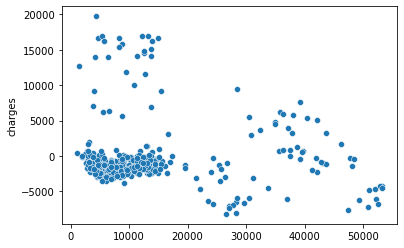

In [26]:
sns.scatterplot(y_pred,res)

C:\Users\Hemali Mane\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='charges', ylabel='Density'>

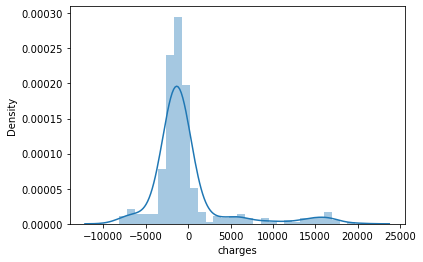

In [27]:
sns.distplot(res,bins=30)

In [28]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
print('MAE',mean_absolute_error(y_test,y_pred))
print('MSE',mean_squared_error(y_test,y_pred))
print('RMSE',np.sqrt(mean_squared_error(y_test,y_pred)))

MAE 2704.8047106145455
MSE 19499556.46016488
RMSE 4415.830211881439


C:\Users\Hemali Mane\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

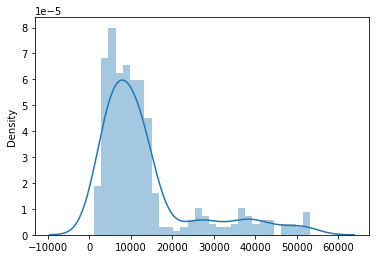

In [29]:
sns.distplot(y_pred,bins=30)

In [30]:
from sklearn import metrics
metrics.explained_variance_score(y_test,y_pred)

0.8691274526000985